In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_excel('/content/drive/MyDrive/Rollete-Game-Prediction/roulette_data15000.xlsx',header=None)

In [4]:
data.head(5)

,0
0,6.0
1,10.0
2,35.0
3,0.0
4,20.0


In [5]:
data.shape

(16236, 1)

In [6]:
data.describe()

,0
count,15846.000000
mean,18.003282
std,10.614112
min,0.000000
25%,9.000000
50%,18.000000
75%,27.000000
max,36.000000


In [7]:
data.columns=["Roulette_Number"]

In [8]:
data.where(~data.isna(), np.nan)

,Roulette_Number
0,6.0
1,10.0
2,35.0
3,0.0
4,20.0
...,...
16231,18.0
16232,15.0
16233,18.0
16234,25.0


In [9]:
data.isna().sum()

,0
Roulette_Number,390


In [10]:
data=data.dropna()

In [11]:
data

,Roulette_Number
0,6.0
1,10.0
2,35.0
3,0.0
4,20.0
...,...
16231,18.0
16232,15.0
16233,18.0
16234,25.0


##Create New Features Based on the Origins

In [12]:
# Left and right neighbors
neighbor_data = {
                  0: ([26, 3], [32, 15]),
                  32: ([0, 26], [15, 19]),
                  15: ([32, 0], [19, 4]),
                  19: ([15, 32], [4, 21]),
                  4: ([19, 15], [21, 2]),
                  21: ([4, 19], [2, 25]),
                  2: ([21, 4], [25, 17]),
                  25: ([2, 21], [17, 34]),
                  17: ([25, 2], [34, 6]),
                  34: ([17, 25], [6, 27]),
                  6: ([34, 17], [27, 13]),
                  27: ([6, 34], [13, 36]),
                  13: ([27, 6], [36, 11]),
                  36: ([13, 27], [11, 30]),
                  11: ([36, 13], [30, 8]),
                  30: ([11, 36], [8, 23]),
                  8: ([30, 11], [23, 10]),
                  23: ([8, 30], [10, 5]),
                  10: ([23, 8], [5, 24]),
                  5: ([10, 23], [24, 16]),
                  24: ([5, 10], [16, 33]),
                  16: ([24, 5], [33, 1]),
                  33: ([16, 24], [1, 20]),
                  1: ([33, 16], [20, 14]),
                  20: ([1, 33], [14, 31]),
                  14: ([20, 1], [31, 9]),
                  31: ([14, 20], [9, 22]),
                  9: ([31, 14], [22, 18]),
                  22: ([9, 31], [18, 29]),
                  18: ([22, 9], [29, 7]),
                  29: ([18, 22], [7, 28]),
                  7: ([29, 18], [28, 12]),
                  28: ([7, 29], [12, 35]),
                  12: ([28, 7], [35, 3]),
                  35: ([12, 28], [3, 26]),
                  3: ([35, 12], [26, 0]),
                  26: ([3, 35], [0, 32])
  }


In [13]:
data['left_neighbor_1'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][0][0])
data['left_neighbor_2'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][0][1])
data['right_neighbor_1'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][1][0])
data['right_neighbor_2'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][1][1])

<ipython-input-13-27695f1751fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['left_neighbor_1'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][0][0])
<ipython-input-13-27695f1751fc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['left_neighbor_2'] = data['Roulette_Number'].map(lambda x: neighbor_data[x][0][1])
<ipython-input-13-27695f1751fc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [14]:
# Opposite number and its neighbors
opposite_data = {
      0: (10, [23, 8], [5, 24]),
      32: (5, [10, 23], [24, 16]),
      15: (24, [5, 10], [16, 33]),
      19: (16, [24, 5], [33, 1]),
      4: (33, [16, 24], [1, 20]),
      21: (1, [33, 16], [20, 14]),
      2: (20, [1, 33], [14, 31]),
      25: (14, [20, 1], [31, 9]),
      17: (31, [14, 20], [9, 22]),
      34: (9, [31, 14], [22, 18]),
      6: (22, [9, 31], [18, 29]),
      27: (18, [22, 9], [29, 7]),
      13: (29, [18, 22], [7, 28]),
      36: (7, [29, 18], [28, 12]),
      11: (28, [7, 29], [12, 35]),
      30: (12, [28, 7], [35, 3]),
      8: (35, [12, 28], [3, 26]),
      23: (3, [35, 12], [26, 0]),
      10: (26, [3, 35], [0, 32]),
      5: (0, [26, 3], [32, 15]),
      24: (32, [0, 26], [15, 19]),
      16: (15, [32, 0], [19, 4]),
      33: (19, [15, 32], [4, 21]),
      1: (4, [19, 15], [21, 2]),
      20: (21, [4, 19], [2, 25]),
      14: (2, [21, 4], [25, 17]),
      31: (25, [2, 21], [17, 34]),
      9: (17, [25, 2], [34, 6]),
      22: (34, [17, 25], [6, 27]),
      18: (6, [34, 17], [27, 13]),
      29: (27, [6, 34], [13, 36]),
      7: (13, [27, 6], [36, 11]),
      28: (36, [13, 27], [11, 30]),
      12: (11, [36, 13], [30, 8]),
      35: (30, [11, 36], [8, 23]),
      3: (8, [30, 11], [23, 10]),
      26: (23, [8, 30], [10, 5])
  }

In [15]:
# Generate opposite number
data['opposite_number'] = data['Roulette_Number'].map(lambda x: opposite_data[x][0])
data['opposite_left_1'] = data['Roulette_Number'].map(lambda x: opposite_data[x][1][0])
data['opposite_left_2'] = data['Roulette_Number'].map(lambda x: opposite_data[x][1][1])
data['opposite_right_1'] = data['Roulette_Number'].map(lambda x: opposite_data[x][2][0])
data['opposite_right_2'] = data['Roulette_Number'].map(lambda x: opposite_data[x][2][1])

<ipython-input-15-a820e70759ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['opposite_number'] = data['Roulette_Number'].map(lambda x: opposite_data[x][0])
<ipython-input-15-a820e70759ce>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['opposite_left_1'] = data['Roulette_Number'].map(lambda x: opposite_data[x][1][0])
<ipython-input-15-a820e70759ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [16]:
# Make 4 category of Dozens
data['dozen'] = pd.cut(data['Roulette_Number'], bins=[-1, 0, 12, 24, 36], labels=['Zero', '1st', '2nd', '3rd'])

In [17]:
data

,Roulette_Number,left_neighbor_1,left_neighbor_2,right_neighbor_1,right_neighbor_2,opposite_number,opposite_left_1,opposite_left_2,opposite_right_1,opposite_right_2,dozen
0,6.0,34,17,27,13,22,9,31,18,29,1st
1,10.0,23,8,5,24,26,3,35,0,32,1st
2,35.0,12,28,3,26,30,11,36,8,23,3rd
3,0.0,26,3,32,15,10,23,8,5,24,Zero
4,20.0,1,33,14,31,21,4,19,2,25,2nd
...,...,...,...,...,...,...,...,...,...,...,...
16231,18.0,22,9,29,7,6,34,17,27,13,2nd
16232,15.0,32,0,19,4,24,5,10,16,33,2nd
16233,18.0,22,9,29,7,6,34,17,27,13,2nd
16234,25.0,2,21,17,34,14,20,1,31,9,3rd


In [18]:
# Red/Black - Mapping based on standard roulette color allocation
red_numbers = {1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36}   #these are the RED colour Numbers and remaining are the black and 0 is green.
# data['Color'] = data['Roulette_Number'].apply(lambda x: 'Red' if x in red_numbers else 'Black')
data['Color'] = np.where(data['Roulette_Number'] == 0, 'green',np.where(data['Roulette_Number'].isin(red_numbers), 'red', 'black'))

In [19]:
data

,Roulette_Number,left_neighbor_1,left_neighbor_2,right_neighbor_1,right_neighbor_2,opposite_number,opposite_left_1,opposite_left_2,opposite_right_1,opposite_right_2,dozen,Color
0,6.0,34,17,27,13,22,9,31,18,29,1st,black
1,10.0,23,8,5,24,26,3,35,0,32,1st,black
2,35.0,12,28,3,26,30,11,36,8,23,3rd,black
3,0.0,26,3,32,15,10,23,8,5,24,Zero,green
4,20.0,1,33,14,31,21,4,19,2,25,2nd,black
...,...,...,...,...,...,...,...,...,...,...,...,...
16231,18.0,22,9,29,7,6,34,17,27,13,2nd,red
16232,15.0,32,0,19,4,24,5,10,16,33,2nd,black
16233,18.0,22,9,29,7,6,34,17,27,13,2nd,red
16234,25.0,2,21,17,34,14,20,1,31,9,3rd,red


In [20]:
# Column Categories
data['Column'] = np.where(data['Roulette_Number'] == 0, 0, (data['Roulette_Number'] - 1) % 3 + 1)

In [21]:
data

,Roulette_Number,left_neighbor_1,left_neighbor_2,right_neighbor_1,right_neighbor_2,opposite_number,opposite_left_1,opposite_left_2,opposite_right_1,opposite_right_2,dozen,Color,Column
0,6.0,34,17,27,13,22,9,31,18,29,1st,black,3.0
1,10.0,23,8,5,24,26,3,35,0,32,1st,black,1.0
2,35.0,12,28,3,26,30,11,36,8,23,3rd,black,2.0
3,0.0,26,3,32,15,10,23,8,5,24,Zero,green,0.0
4,20.0,1,33,14,31,21,4,19,2,25,2nd,black,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,18.0,22,9,29,7,6,34,17,27,13,2nd,red,3.0
16232,15.0,32,0,19,4,24,5,10,16,33,2nd,black,3.0
16233,18.0,22,9,29,7,6,34,17,27,13,2nd,red,3.0
16234,25.0,2,21,17,34,14,20,1,31,9,3rd,red,1.0


In [22]:
# Odd/Even
data['Odd_Even'] = np.where(data['Roulette_Number'] == 0, 'Zero', np.where(data['Roulette_Number'] % 2 == 1, 'Odd', 'Even'))

In [23]:
# data

In [24]:
# Make Feature of low and high categoery
data['low_high'] = np.where(data['Roulette_Number'] == 0, 'Zero', np.where(data['Roulette_Number'] <= 18, 'Low', 'High'))

In [25]:
# Series A, B, C (consolidated into a single column)
series_a = [25, 2, 21, 4, 19, 15, 32, 0, 26, 3, 35, 12, 28, 7, 29, 18, 22, 9]
series_b = [6, 34, 17, 1, 20, 14, 31, 9, 11, 36, 13, 27]
series_c = [33, 16, 24, 5, 10, 23, 8, 30, 11, 36, 13, 27]

data['Series'] = np.select(
    [data['Roulette_Number'].isin(series_a), data['Roulette_Number'].isin(series_b), data['Roulette_Number'].isin(series_c)],
    ['series_a', 'series_b', 'series_c'],
    default='None'
)

In [26]:
data

,Roulette_Number,left_neighbor_1,left_neighbor_2,right_neighbor_1,right_neighbor_2,opposite_number,opposite_left_1,opposite_left_2,opposite_right_1,opposite_right_2,dozen,Color,Column,Odd_Even,low_high,Series
0,6.0,34,17,27,13,22,9,31,18,29,1st,black,3.0,Even,Low,series_b
1,10.0,23,8,5,24,26,3,35,0,32,1st,black,1.0,Even,Low,series_c
2,35.0,12,28,3,26,30,11,36,8,23,3rd,black,2.0,Odd,High,series_a
3,0.0,26,3,32,15,10,23,8,5,24,Zero,green,0.0,Zero,Zero,series_a
4,20.0,1,33,14,31,21,4,19,2,25,2nd,black,2.0,Even,High,series_b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16231,18.0,22,9,29,7,6,34,17,27,13,2nd,red,3.0,Even,Low,series_a
16232,15.0,32,0,19,4,24,5,10,16,33,2nd,black,3.0,Odd,Low,series_a
16233,18.0,22,9,29,7,6,34,17,27,13,2nd,red,3.0,Even,Low,series_a
16234,25.0,2,21,17,34,14,20,1,31,9,3rd,red,1.0,Odd,High,series_a


In [27]:
data.isna().sum()

,0
Roulette_Number,0
left_neighbor_1,0
left_neighbor_2,0
right_neighbor_1,0
right_neighbor_2,0
opposite_number,0
opposite_left_1,0
opposite_left_2,0
opposite_right_1,0
opposite_right_2,0


In [28]:
data.to_csv('data_15000.csv', index=False)

In [29]:
data_500=data.head(500)

In [30]:
data_500.to_csv('train-data500.csv', index=False)

#**Perform EDA**

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15846 entries, 0 to 16235
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Roulette_Number   15846 non-null  float64 
 1   left_neighbor_1   15846 non-null  int64   
 2   left_neighbor_2   15846 non-null  int64   
 3   right_neighbor_1  15846 non-null  int64   
 4   right_neighbor_2  15846 non-null  int64   
 5   opposite_number   15846 non-null  int64   
 6   opposite_left_1   15846 non-null  int64   
 7   opposite_left_2   15846 non-null  int64   
 8   opposite_right_1  15846 non-null  int64   
 9   opposite_right_2  15846 non-null  int64   
 10  dozen             15846 non-null  category
 11  Color             15846 non-null  object  
 12  Column            15846 non-null  float64 
 13  Odd_Even          15846 non-null  object  
 14  low_high          15846 non-null  object  
 15  Series            15846 non-null  object  
dtypes: category(1), float6

In [33]:
# sns.pairplot(data)

In [34]:
!pip install pandas==1.5.3

<ipython-input-35-0868bdbbcbeb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


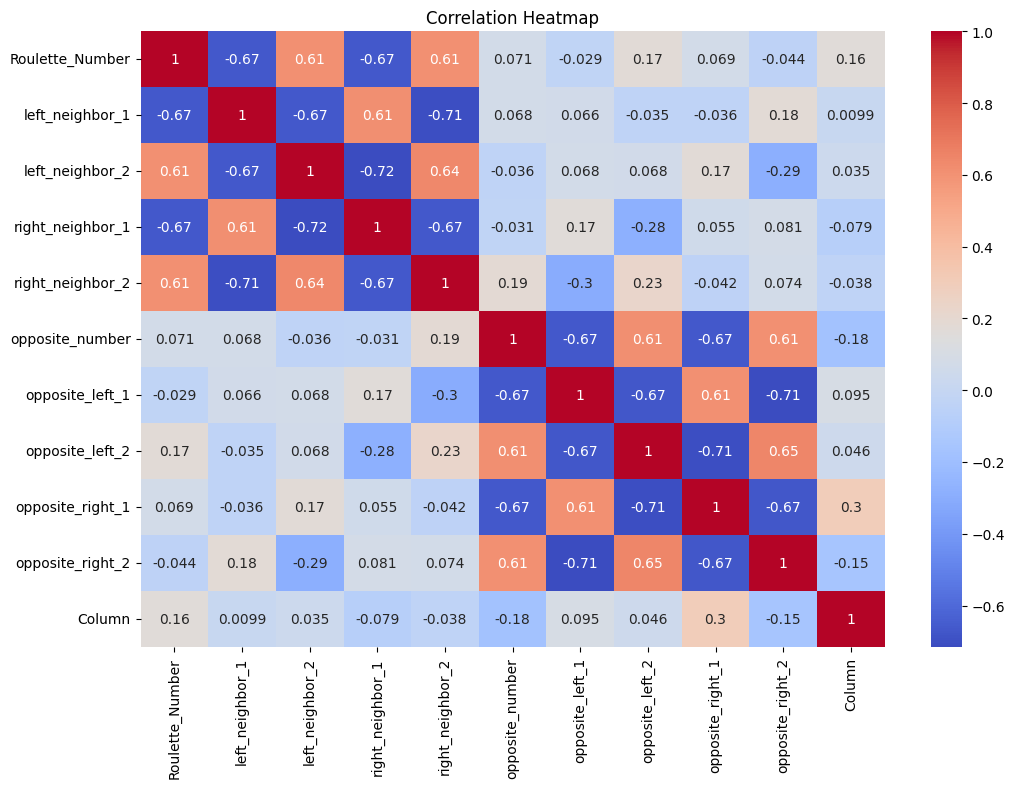

In [35]:
# Heat map

plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

<ipython-input-36-6d67a59ccad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


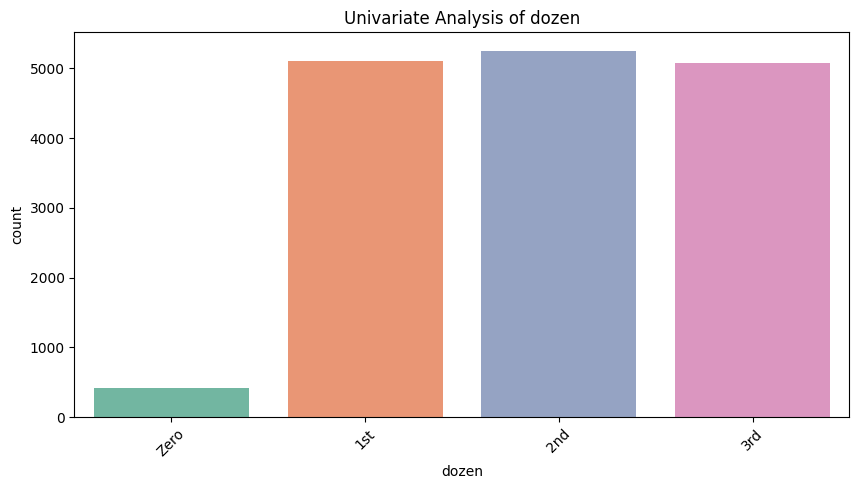

<ipython-input-36-6d67a59ccad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


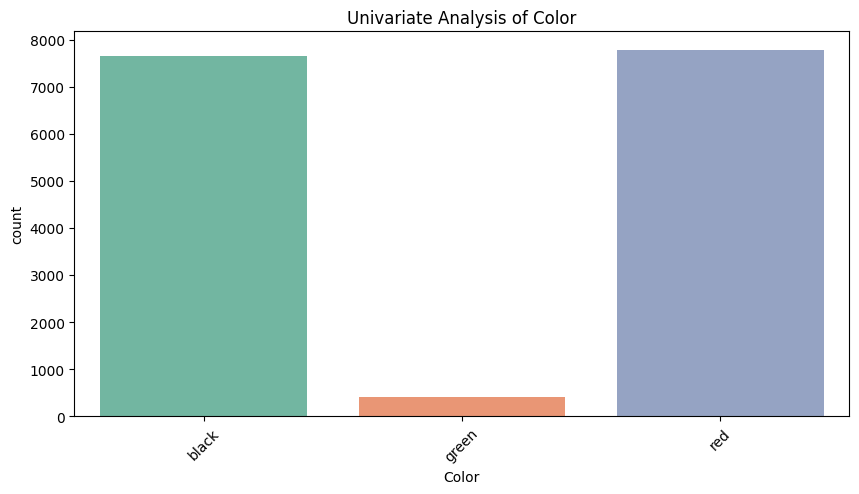

<ipython-input-36-6d67a59ccad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


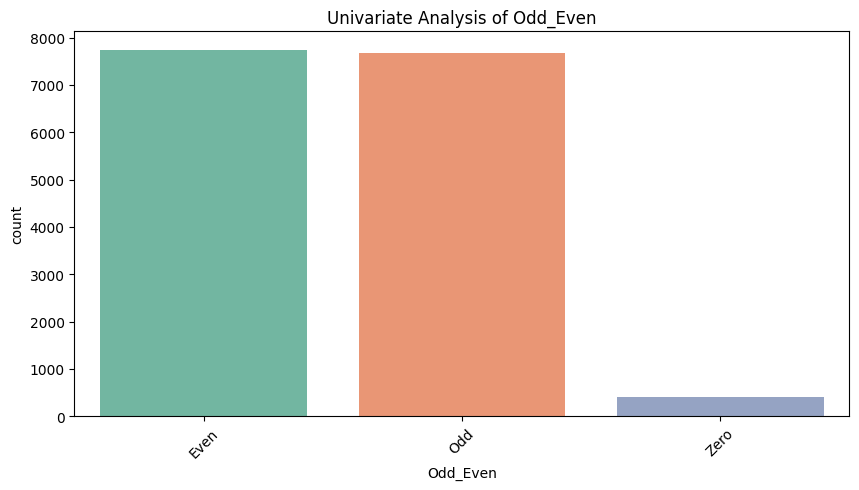

<ipython-input-36-6d67a59ccad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


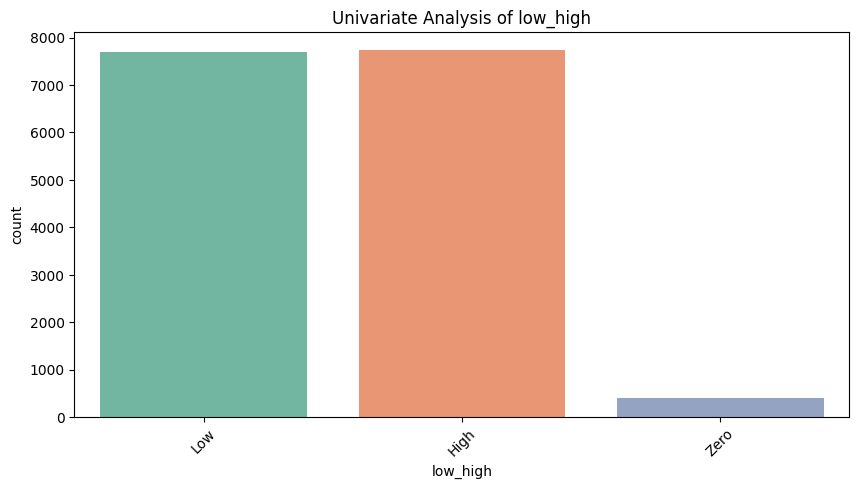

<ipython-input-36-6d67a59ccad2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=data, palette='Set2')


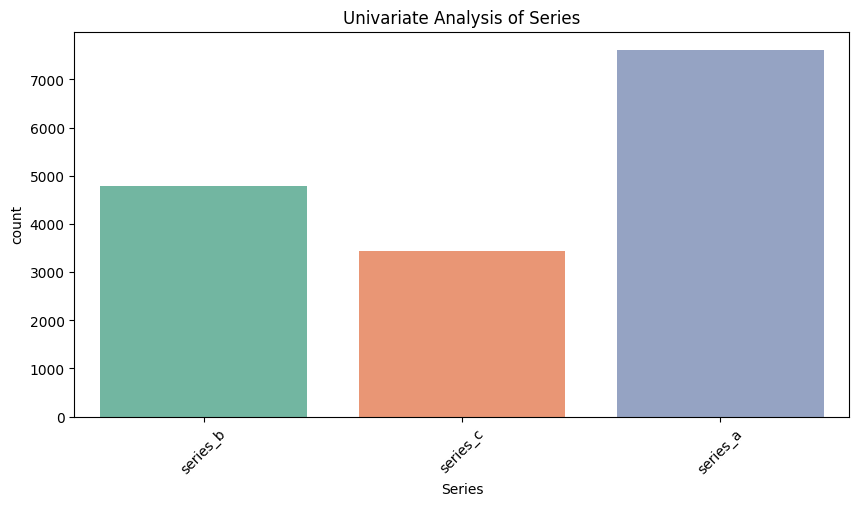

In [36]:
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        plt.figure(figsize=(10, 5))
        sns.countplot(x=col, data=data, palette='Set2')
        plt.title(f'Univariate Analysis of {col}')
        plt.xticks(rotation=45)
        plt.show()

In [37]:
# from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA

In [38]:
# from sklearn.preprocessing import OneHotEncoder

# # One-Hot Encoding the Categorical Variables
# df_encoded = pd.get_dummies(data, drop_first=True)

# # Elbow Method Function
# def elbow_method(data, max_clusters=10):
#     wcss = []
#     # Try different numbers of clusters
#     for i in range(1, max_clusters+1):
#         kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
#         kmeans.fit(data)
#         wcss.append(kmeans.inertia_)  # Inertia: Sum of squared distances to closest cluster center

#     # Plotting the elbow curve
#     plt.figure(figsize=(10, 6))
#     plt.plot(range(1, max_clusters+1), wcss, marker='o', linestyle='--')
#     plt.title('Elbow Method for Optimal Number of Clusters')
#     plt.xlabel('Number of Clusters')
#     plt.ylabel('WCSS')
#     plt.show()

# # Apply Elbow Method
# elbow_method(df_encoded)


In [39]:
# def clustering_analysis(df, n_clusters=3):
#     # Apply KMeans clustering
#     kmeans = KMeans(n_clusters=n_clusters, random_state=42)
#     clusters = kmeans.fit_predict(df.select_dtypes(include=[np.number]))

#     # Add the cluster labels to the dataset
#     df['Cluster'] = clusters

#     # Perform PCA for visualization in 2D
#     pca = PCA(n_components=2)
#     pca_components = pca.fit_transform(df.select_dtypes(include=[np.number]))

#     plt.figure(figsize=(8, 6))
#     plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
#     plt.title('PCA - Clustering Visualization')
#     plt.xlabel('PCA Component 1')
#     plt.ylabel('PCA Component 2')
#     plt.colorbar()
#     plt.show()

#     return df

In [40]:
# # Perform clustering
# df = clustering_analysis(data, n_clusters=4)

In [41]:
# df

#Number Repeatation pattern

In [42]:
# Generalize the pattern analysis across all numbers
pattern_analysis = {}

# Iterate through all unique Roulette numbers to analyze their patterns
for number in data['Roulette_Number'].unique():
    # Filter the data for the specific number
    number_data = data[data['Roulette_Number'] == number]

    # Find the number that comes immediately after the specific number in the next row
    next_number = data.shift(-1).loc[number_data.index, 'Roulette_Number']

    # Find the count of occurrences for the next numbers
    next_number_counts = next_number.value_counts()

    # Capture the feature patterns of the next numbers
    next_features = data.shift(-1).loc[number_data.index, ['dozen', 'Color', 'Column', 'Odd_Even', 'low_high', 'Series']]

    # Store results in a dictionary
    pattern_analysis[number] = {
        'next_number_counts': next_number_counts,
        'next_features': next_features.value_counts().head(5)
    }

In [43]:
seq_data=pd.read_excel("/content/drive/MyDrive/Rollete-Game-Prediction/NEIGHBOUR NUMBER.xlsx")
seq_data=seq_data['NUMBER']

In [44]:
numbers=seq_data[:37]
numbers.to_list()

[0.0,
 32.0,
 15.0,
 19.0,
 4.0,
 21.0,
 2.0,
 25.0,
 17.0,
 34.0,
 6.0,
 27.0,
 13.0,
 36.0,
 11.0,
 30.0,
 8.0,
 23.0,
 10.0,
 5.0,
 24.0,
 16.0,
 33.0,
 1.0,
 20.0,
 14.0,
 31.0,
 9.0,
 22.0,
 18.0,
 29.0,
 7.0,
 28.0,
 12.0,
 35.0,
 3.0,
 26.0]

In [45]:
# Display the pattern analysis for a few numbers as an example
numbers= {0.0,
 32.0,
 15.0,
 19.0,
 4.0,
 21.0,
 2.0,
 25.0,
 17.0,
 34.0,
 6.0,
 27.0,
 13.0,
 36.0,
 11.0,
 30.0,
 8.0,
 23.0,
 10.0,
 5.0,
 24.0,
 16.0,
 33.0,
 1.0,
 20.0,
 14.0,
 31.0,
 9.0,
 22.0,
 18.0,
 29.0,
 7.0,
 28.0,
 12.0,
 35.0,
 3.0,
 26.0}

patterns = {number: pattern_analysis[number] for number in numbers}

patterns

{0.0: {'next_number_counts': 17.0    17
  15.0    16
  19.0    16
  9.0     15
  33.0    14
  29.0    14
  13.0    14
  24.0    13
  0.0     13
  16.0    13
  32.0    13
  14.0    13
  18.0    12
  21.0    12
  26.0    12
  8.0     12
  31.0    12
  4.0     12
  12.0    11
  34.0    11
  7.0     11
  2.0     11
  1.0     11
  22.0    10
  30.0    10
  27.0    10
  25.0     9
  11.0     9
  10.0     9
  20.0     9
  5.0      8
  6.0      8
  35.0     8
  36.0     7
  23.0     6
  28.0     6
  3.0      5
  Name: Roulette_Number, dtype: int64,
  'next_features': dozen  Color  Column  Odd_Even  low_high  Series  
  3rd    black  2.0     Odd       High      series_a    22
  1st    red    3.0     Odd       Low       series_a    20
  2nd    black  2.0     Odd       Low       series_b    17
                3.0     Odd       Low       series_a    16
         red    1.0     Odd       High      series_a    16
  dtype: int64},
 1.0: {'next_number_counts': 22.0    19
  13.0    15
  29.0    15
  2.0

In [47]:
# data.drop("Color_Transition",axis=1,inplace=True)

In [ ]:
# # Filter the data to focus on when the current color is red
# red_followed_by = data[data['Color'] == 'red']['Next_Color']

# # Count how many times red is followed by red, black, or green
# red_followed_by_counts = red_followed_by.value_counts()

# # Display the results
# print("After Red, the following colors appear:")
# print(red_followed_by_counts)

# # If you want to calculate probabilities
# red_followed_by_probabilities = red_followed_by_counts / red_followed_by_counts.sum()

# print("\nProbabilities of colors following Red:")
# print(red_followed_by_probabilities)


# Count the occurrences of each red streak length followed by black

In [48]:
# Extract the "Color" column
color_sequence = data['Color'].dropna().tolist()

# Initialize variables to track sequences
red_streak = 0
red_streaks_followed_by_black = []

# Analyze the pattern in the color sequence
for color in color_sequence:
    if color == 'red':
        red_streak += 1
    elif color == 'black':
        if red_streak > 0:
            red_streaks_followed_by_black.append(red_streak)
        red_streak = 0
    else:
        red_streak = 0  # Reset if a different color or invalid entry is encountered

# Show the results
red_streaks_followed_by_black[:10], len(red_streaks_followed_by_black)


([2, 1, 3, 3, 3, 3, 1, 1, 1, 1], 3767)

In [49]:
# Count the occurrences of each red streak length followed by black
red_streaks_count = Counter(red_streaks_followed_by_black)

# Convert the result to a DataFrame for better readability
red_streaks_count_df = pd.DataFrame(red_streaks_count.items(), columns=['Red_Streak_Length', 'Count']).sort_values(by='Red_Streak_Length')

# Display the results
red_streaks_count_df

,Red_Streak_Length,Count
1,1,1896
0,2,963
2,3,488
3,4,203
6,5,113
5,6,53
4,7,26
8,8,11
9,9,8
11,10,2


# Count the occurrences of each red streak length followed by green

In [50]:
# Initialize variables to track sequences for red followed by green
red_streak = 0
red_streaks_followed_by_green = []

# Analyze the pattern in the color sequence for red followed by green
for color in color_sequence:
    if color == 'red':
        red_streak += 1
    elif color == 'green':
        if red_streak > 0:
            red_streaks_followed_by_green.append(red_streak)
        red_streak = 0
    else:
        red_streak = 0  # Reset if a different color or invalid entry is encountered

# Count the occurrences of each red streak length followed by green
red_streaks_green_count = Counter(red_streaks_followed_by_green)

# Convert the result to a DataFrame for better readability
red_streaks_green_count_df = pd.DataFrame(red_streaks_green_count.items(), columns=['Red_Streak_Length', 'Count']).sort_values(by='Red_Streak_Length')

# Display the results
red_streaks_green_count_df

,Red_Streak_Length,Count
0,1,93
3,2,45
2,3,27
5,4,13
1,5,6
7,6,2
4,7,3
6,11,1


In [50]:
# Initialize variables to track sequences for red followed by green
red_streak = 0
red_streaks_followed_by_green = []

# Analyze the pattern in the color sequence for red followed by green
for color in color_sequence:
    if color == 'red':
        red_streak += 1
    elif color == 'green':
        if red_streak > 0:
            red_streaks_followed_by_green.append(red_streak)
        red_streak = 0
    else:
        red_streak = 0  # Reset if a different color or invalid entry is encountered

# Count the occurrences of each red streak length followed by green
red_streaks_green_count = Counter(red_streaks_followed_by_green)

# Convert the result to a DataFrame for better readability
red_streaks_green_count_df = pd.DataFrame(red_streaks_green_count.items(), columns=['Red_Streak_Length', 'Count']).sort_values(by='Red_Streak_Length')

# Display the results
red_streaks_green_count_df

In [52]:
# Extract the "Color" and "Odd/Even" columns
color_odd_even_sequence = data[['Color', 'Odd_Even']].dropna()

# Initialize counters for odd/even when the color is red
odd_count_when_red = 0
even_count_when_red = 0

# Analyze the pattern in the color and odd/even sequences
for index, row in color_odd_even_sequence.iterrows():
    color = row['Color']
    odd_even = row['Odd_Even']

    if color == 'red':
        if odd_even == 'Odd':
            odd_count_when_red += 1
        elif odd_even == 'Even':
            even_count_when_red += 1

# Create a dictionary to hold the counts for odd and even numbers when the color is red
red_number_frequency = {'Odd_Count_When_Red': odd_count_when_red, 'Even_Count_When_Red': even_count_when_red}

# Convert the result to a DataFrame for better readability
red_number_frequency_df = pd.DataFrame(list(red_number_frequency.items()), columns=['Number_Type', 'Count'])

# Display the results
red_number_frequency_df


,Number_Type,Count
0,Odd_Count_When_Red,4309
1,Even_Count_When_Red,3473


#Depend on the colour pattern

In [53]:
# Fill NaN values in 'Color' column with an empty string for better sequence detection
data['Color'] = data['Color'].fillna('')
# Create a new column for consecutive color sequences
data['Color_Sequence'] = data['Color'].shift(2) + '-' + data['Color'].shift(1) + '-' + data['Color']
# Remove initial NaN sequences (first two rows will have NaN sequences due to shifting)
roulette_data = data.dropna(subset=['Color_Sequence'])
# Calculate probabilities of 'Series' depending on the 'Color_Sequence'
series_probability = roulette_data.groupby(['Color_Sequence', 'Series']).size().unstack(fill_value=0)
series_probability = series_probability.div(series_probability.sum(axis=1), axis=0) * 100
# Display the resulting probabilities
series_probability

Series,series_a,series_b,series_c
Color_Sequence,,,
black-black-black,43.894204,34.833990,21.271806
black-black-green,100.000000,0.000000,0.000000
black-black-red,49.667406,28.104213,22.228381
black-green-black,44.660194,30.097087,25.242718
black-green-green,100.000000,0.000000,0.000000
black-green-red,59.595960,23.232323,17.171717
black-red-black,45.222222,33.500000,21.277778
black-red-green,100.000000,0.000000,0.000000
black-red-red,48.775293,28.913738,22.310969
